# PROJEKT 2 - ANALIZA OBRAZÓW DNA OKA (SEGMENTACJA OBRAZU)

Celem projektu jest stworzenie systemu służącego do segmentacji (wykrywania) naczyń krwionośnych w obrazach dna oka oraz wykonanie eksperymentów weryfikujących jakość segmentacji.

![title](pictures/EYE.png)

Import wykorzystanych w projekcie bibliotek:

In [1]:
from pylab import *
from skimage import img_as_float
from skimage.color import rgb2gray
from skimage.filters import frangi, meijering, median
from skimage.morphology import disk, dilation, erosion, thin
from skimage.exposure import equalize_adapthist

In [2]:
folder = 'pictures/'
images = ['im0001', 'im0002', 'im0003', 'im0004', 'im0005', 'im0044', 'im0077', 'im0081', 'im0082', 'im0139', 'im0162', 'im0163', 'im0235', 'im0236', 'im0239', 'im0240', 'im0255', 'im0291', 'im0319', 'im0324']
in_img = '.ppm'
out_img = '.ah.ppm'

Funkacja pomocnicza wyświetlająca pobrany jako argument obraz w odpowiednim miejscu:

In [3]:
def show_image(image, position):
    subplot(position[0], position[1], position[2])
    plt.axis('off')
    plt.imshow(image, cmap='gray')

Funkcja przetwarzająca obraz wejściowy w celu wyodrębnienia naczyń krwionośnych:

In [4]:
def process_image(image):
    
    image = img_as_float(image)
    
    mask = rgb2gray(image)
    mask[mask > 0.15] = 1
    mask[mask <= 0.15] = 0
    mask = -mask
    mask = erosion(mask, disk(1))
    mask = dilation(mask, disk(5))
    mask = erosion(mask, disk(3))
    
    image = image[:,:,1]
    image = equalize_adapthist(image, clip_limit=0.02)
    image = meijering(image)
    
    thin1 = erosion(image)
    thin1 = erosion(thin1)
    thin1[mask == 0] = 0

    thick = dilation(image)
    thick = dilation(thick)
    thick[mask == 0] = 0
    
    image = thin1*thick
    image = equalize_adapthist(image, clip_limit=0.01)
    
    image[image > 0.15] = 1
    image[image <= 0.15] = 0
    
    image = median(image)
    
    image = thin(image, max_iter=3)
    image = dilation(dilation(image))
    
    return image

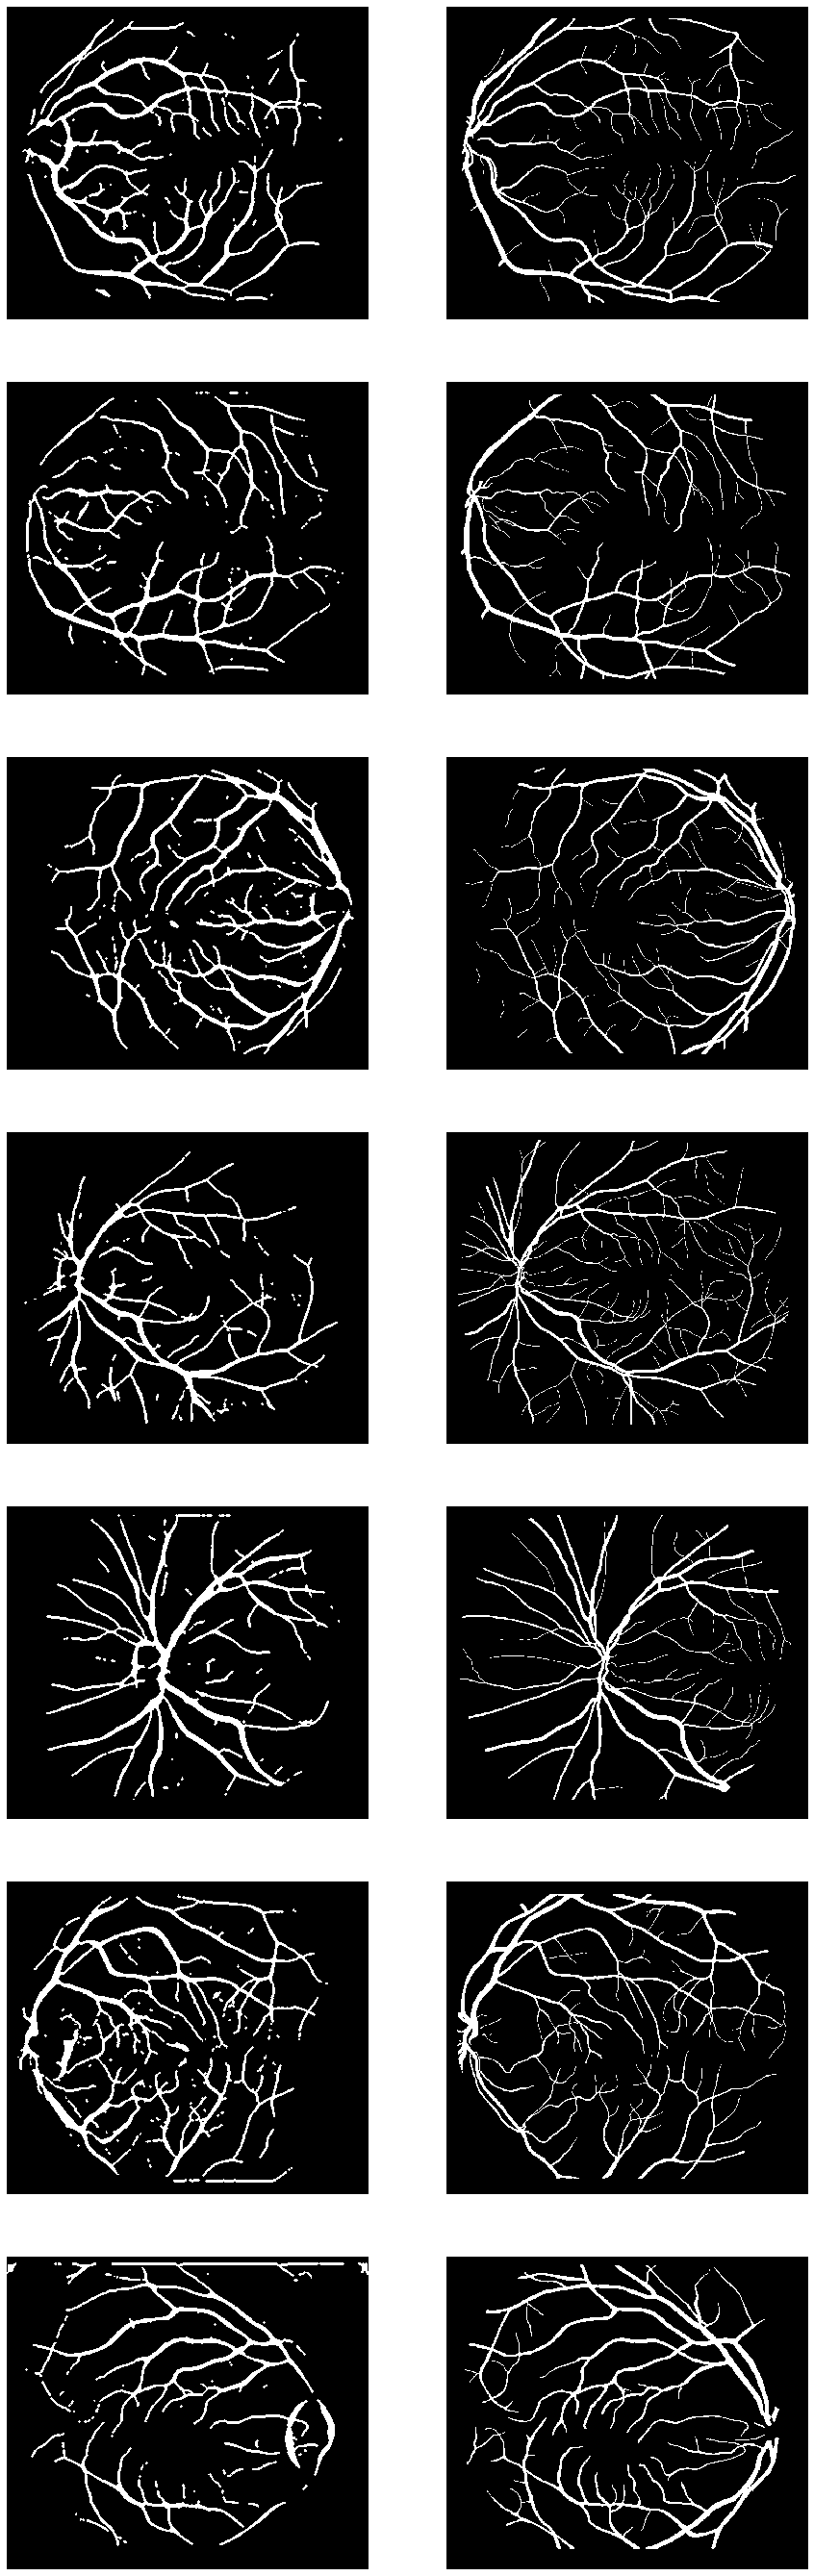

In [5]:
images = ['im0077', 'im0081', 'im0082', 'im0162', 'im0163', 'im0239', 'im0240']

columns = 2
rows = len(images)
fig=plt.figure(figsize=(15, rows * 7))

for img in range(rows):
    
    original_image = plt.imread(folder + images[img] + in_img)
    
    processed_image = process_image(original_image)
    show_image(processed_image, [rows, columns, img*columns + 1])
    
    out_image = plt.imread(folder + images[img] + out_img)
    show_image(out_image, [rows, columns, img*columns + 2])    
   
plt.show()